In [18]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.datasets import load_sample_image
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

In Scikit Learn, import load_sample_image and load “china.jpg” or “flower.jpg” picture

In [19]:
# Chargement des données Sample Image
china = load_sample_image("china.jpg")

china[0:5]

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       [[175, 202, 232],
        [175, 202, 232],
        [175, 202, 232],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       [[174, 201, 230],
        [174, 201, 230],
        [175, 202, 231],
        ...,
        [251, 253, 252],
        [251, 253, 252],
        [251, 253, 252]]], dtype=uint8)

With plotly express, diplay your picture

a. Hint : we will use imshow

In [20]:
picture = px.imshow(china)
picture

Look at the dataset's shape

In [21]:
china.shape

(427, 640, 3)

----> Our dataset is split between the height of the pixel, the width of the pixel and its color in RGB

Divide your dataset by 255 then resize it in two dimensions (length x width, RGB).

a. Hint: You can use the .reshape() method.

In [22]:
# Normalisation des valeurs de pixel entre 0 et 1
data = china / 255.0

# Changement de forme pour créer une liste de pixels
data = data.reshape(427 * 640, 3)

# Afficher les dimensions finales
print(data.shape)

(273280, 3)


We will reduce the number of colours to 16. To do this create a KMeans algorithm that will take 16 clusters.

In [23]:
# Configurer MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=16, random_state=42, batch_size=1000)

# Ajuster le modèle sur les données
kmeans.fit(data)

# Afficher les centres des clusters (valeurs RGB des 16 couleurs dominantes)
print("Centres des clusters (couleurs dominantes) :")
print(kmeans.cluster_centers_)

Centres des clusters (couleurs dominantes) :
[[0.80415181 0.82443412 0.84413862]
 [0.41161313 0.3665171  0.1901576 ]
 [0.07252837 0.06370403 0.03933404]
 [0.54756776 0.54579043 0.47358975]
 [0.86240672 0.62581865 0.45835472]
 [0.94459955 0.95985072 0.98457136]
 [0.33966157 0.2156017  0.11800982]
 [0.41034839 0.42131201 0.37776716]
 [0.18051682 0.17080751 0.13092987]
 [0.59841989 0.64308892 0.63092037]
 [0.8605503  0.91054778 0.96558087]
 [0.69625477 0.39536974 0.28852551]
 [0.28444626 0.29447371 0.25569082]
 [0.51520314 0.49529851 0.28177763]
 [0.7493405  0.8382015  0.93893652]
 [0.71329079 0.75158432 0.74216337]]


For each of the colors present in your dataset, reassign the color code of the centroid of the corresponding cluster in a variable that we will call new_colors .

In [25]:
# Remplacer chaque pixel par la couleur de son cluster
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
print("Pixels après réduction de couleur :")
print(new_colors)

Pixels après réduction de couleur :
[[0.7493405  0.8382015  0.93893652]
 [0.7493405  0.8382015  0.93893652]
 [0.7493405  0.8382015  0.93893652]
 ...
 [0.18051682 0.17080751 0.13092987]
 [0.07252837 0.06370403 0.03933404]
 [0.07252837 0.06370403 0.03933404]]


Resize new_colors to 3 dimensions

In [26]:
china_recolored = new_colors.reshape(china.shape)

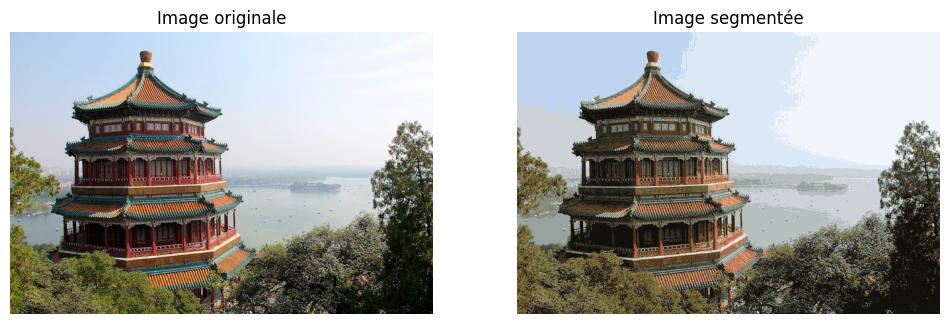

In [27]:
# Visualisation de l'image originale et de l'image segmentée
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(china)
ax[0].set_title("Image originale")
ax[0].axis('off')

ax[1].imshow(china_recolored)
ax[1].set_title("Image segmentée")
ax[1].axis('off')

plt.show()